# **Project Proposal**
## Title: ...
Group 8

Team members: ...

## **Introduction**
Heart disease is a subset of cardiovascular diseases, the global leading cause of death. From the Framingham Heart Study, many different factors, such as age, are found to be correlated with heart disease. 

The question we will try to answer with this project is: Can we use `age`, `exang` (exercise induced angina), `??` to predict whether someone will be diagnosed with heart disease (yes or no)? 

The dataset we will use is "Heart Disease" Data Set, consisting of 14 attributes: 
* `age` (in years)
* `sex` (1 = male; 0 = female)
* `cp`: Chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
* `trestbps`: resting blood pressure (mmHg)
* `chol`: serum cholesterol (mg/dl)
* `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
* `restecg`: resulting electrocardiographic results
* `thalach`: maximum heart rate achieved 
* `exang`: exercise induced angina (1= yes; 0= no)
* `oldpeak`: ST depression induced by exercise relative to rest
*  `slope`: slope of peak exercise ST segment
    - Value 1: upsloping = 3
    - Value 2: flat = 2
    - Value 3: downsloping = 1
* `ca`: number of major vessels (0, 1, 2, 3)
* `thal`: 
    - Value 3 = normal
    - Value 6 = fixed defect
    - Value 7 = reversible defect
* `num`: diagnosis of heart disease
    - Value 0: Healthy, <50% diameter narrowing
    - Value 1: Diagnosed with stage 1, >50% diameter narrowing
    - Value 2: Diagnosed with stage 2, >50% diameter narrowing
    - Value 3: Diagnosed with stage 3, >50% diameter narrowing
    - Value 4: Diagnosed with stage 4, >50% diameter narrowing


## **Preliminary exploratory data analysis**

### Reading and cleaning the data

In [2]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In this following cell we perform 3 steps:

* We read the data directly from the internet into this R notebook.
* Since the data doesn't have the columns' names in its file, we explicitly write the names from the information we find in https://archive.ics.uci.edu/ml/datasets/Heart+Disease.
* We remove rows which have null values by filtering. In this case null values are represented as "?", and we know that `ca` and `thal` have some of this null values
* We change the data type of some of the variables since in the webpage mentioned above we can see that some variables should be categorical,as they only have a few possible values.
* We create a new variable from `num`. Instead of having different values of diagnosed (`num`= 1, 2, 3 or 4) we just consider if the person has been diagnosed with a heart disease or not.

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                                    "exang", "oldpeak", "slope", "ca", "thal", "num")) %>%
        filter(ca != "?" & thal != "?") %>%
        mutate(sex = as.factor(sex), cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg),
               exang = as.factor(exang), slope = as.factor(slope), thal = as.factor(thal), num = as.factor(num),
               ca = as.factor(ca),
               target = ifelse(num==0, "Healthy", "Diagnosed"), target = as.factor(target))
        

head(data, 10)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Healthy
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Diagnosed
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Diagnosed
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Healthy
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Healthy
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,Healthy
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,Diagnosed
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,Healthy
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,Diagnosed


At this point we can see that the data looks tidy. The dataset already contained tidy data, therefore we only needed to add the columns' names, remove the null values and the specify data types, plus we aadditionally created a new variable to simplify answering our question.

### Splitting data into Train and Test

For the next part, we want to explore our dataset, but only the training dataset. Therefore we first will split the data into 2 sub-datasets. We will use 75% of our data for training and the variable we want to classify is `num`.


In [4]:
data_split <- initial_split(data, prop = 0.75, strata = num)  
data_train <- training(data_split)   
data_test <- testing(data_split)

head(data_train, 5)
head(data_test, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Healthy
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,Diagnosed
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Diagnosed
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Healthy
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Healthy


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,Diagnosed
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,Healthy
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,Diagnosed
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,Healthy
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0,Healthy


Now we can see the size we originally had from the whole dataset, as well as the size of the training dataset and the test dataset.

In [5]:
nrow(data)
nrow(data_train)
nrow(data_test)

[1] 297

[1] 224

[1] 73

### Training Data Summary Table
We perform an exploratory data analysis of the data and show it in a table format.  

CAN USE THIS:
summarize the data in at least one table (this is ). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [6]:
str(data_train)

tibble [224 × 15] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:224] 63 67 67 37 41 56 53 57 56 44 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 3 2 ...
 $ trestbps: num [1:224] 145 160 120 130 130 120 140 140 130 120 ...
 $ chol    : num [1:224] 233 286 229 250 204 236 203 192 256 263 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 2 1 2 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 1 ...
 $ thalach : num [1:224] 150 108 129 187 172 178 155 148 142 173 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 2 1 2 1 ...
 $ oldpeak : num [1:224] 2.3 1.5 2.6 3.5 1.4 0.8 3.1 0.4 0.6 0 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 2 2 1 ...
 $ ca      : Factor w/ 4 levels "0.0","1.0","2.0",..: 1 4 3 1 1 1 1 1 2 1 ...
 $ thal    : Factor w/ 3 levels "3.0","6.0","7.0": 2 1 3 1 1 1 3 2 2 3 ...
 $ num     : Factor w/ 5 levels "0","1","2","3",..: 1 3 2 1 1 

In [7]:
#library(mlr)
#summarizeColumns(data_train)

# CAN'T USE BECAUSE CAN'T DOWNLOAD mlr PACKAGE :(

In [8]:
EDA_data <- data_train %>%
    group_by(num) %>%
    summarize(n = n(),
              mean_age = mean(age, na.rm = TRUE),
              mean_trestbps = mean(trestbps, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE),
              mean_thalach = mean(thalach, na.rm = TRUE),
              mean_oldpeak = mean(oldpeak, na.rm = TRUE),
              majority_sex = sex[n == max(n)][1],
              majority_cp = cp[n == max(n)][1],
              majority_fbs = fbs[n == max(n)][1],
              majority_restecg = restecg[n == max(n)][1],
              majority_exang = exang[n == max(n)][1],
              majority_slope = slope[n == max(n)][1],
              majority_ca = ca[n == max(n)][1],
              majority_thal = thal[n == max(n)][1])

EDA_data

`summarise()` ungrouping output (override with `.groups` argument)



num,n,mean_age,mean_trestbps,mean_chol,mean_thalach,mean_oldpeak,majority_sex,majority_cp,majority_fbs,majority_restecg,majority_exang,majority_slope,majority_ca,majority_thal
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,121,52.60331,129.2893,242.0496,158.3388,0.5867769,1,1,1,2,0,3,0.0,6.0
1,40,55.05000,131.8000,247.6500,147.0750,1.1150000,1,4,0,2,1,2,2.0,7.0
2,26,57.57692,136.6538,263.5000,133.3462,1.8576923,1,4,0,2,1,2,3.0,3.0
3,27,56.51852,137.2593,248.8519,130.4074,1.8814815,1,3,0,2,0,1,2.0,7.0
4,10,60.30000,139.0000,250.8000,144.6000,2.2700000,1,4,0,2,1,2,2.0,7.0


### Training Data Visualization Analysis

Now we perform another exploratory data analysis to visualize the data with some relevant plots to our analysis. 

We will compares the distributions of each of the predictor variables we plan to use to our predictive variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



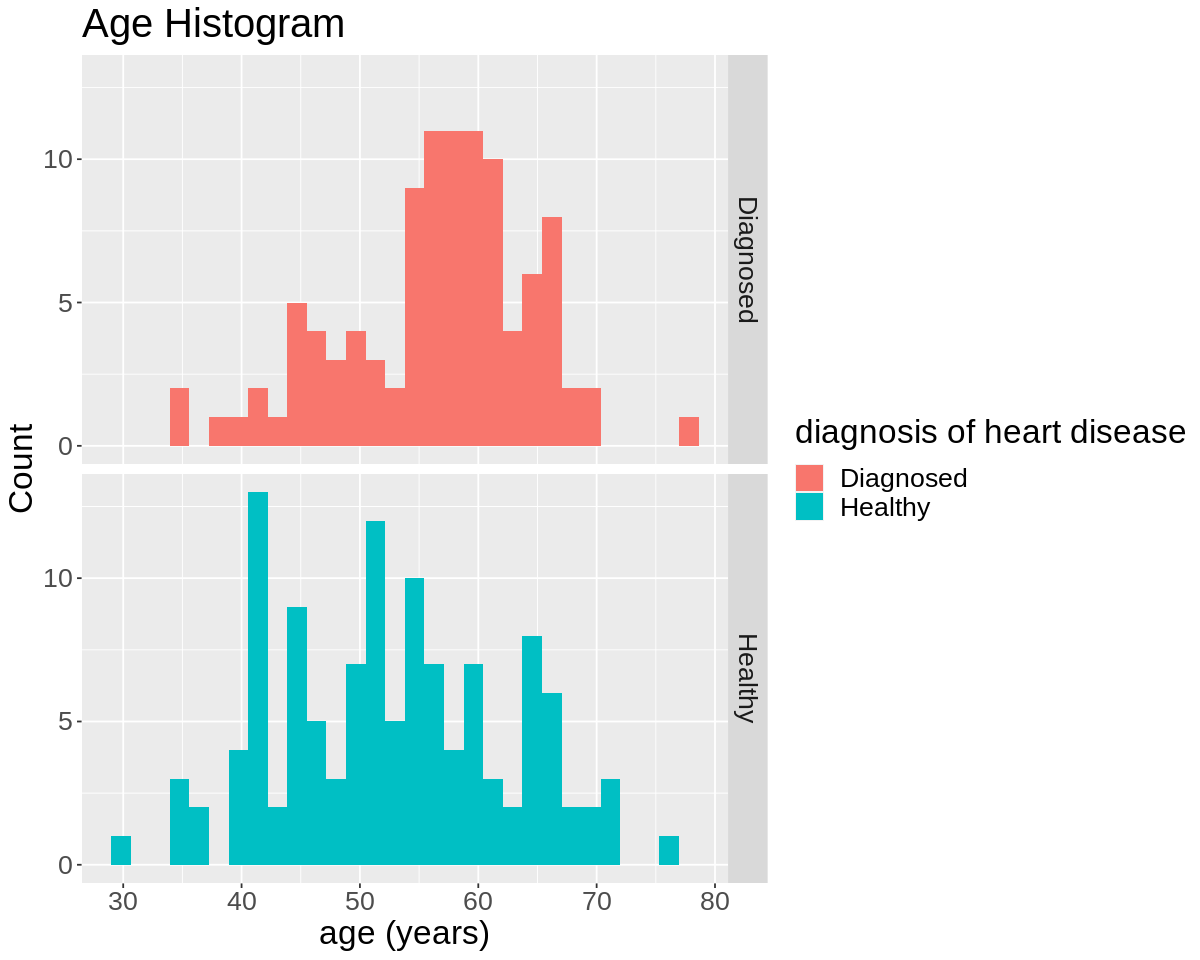

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



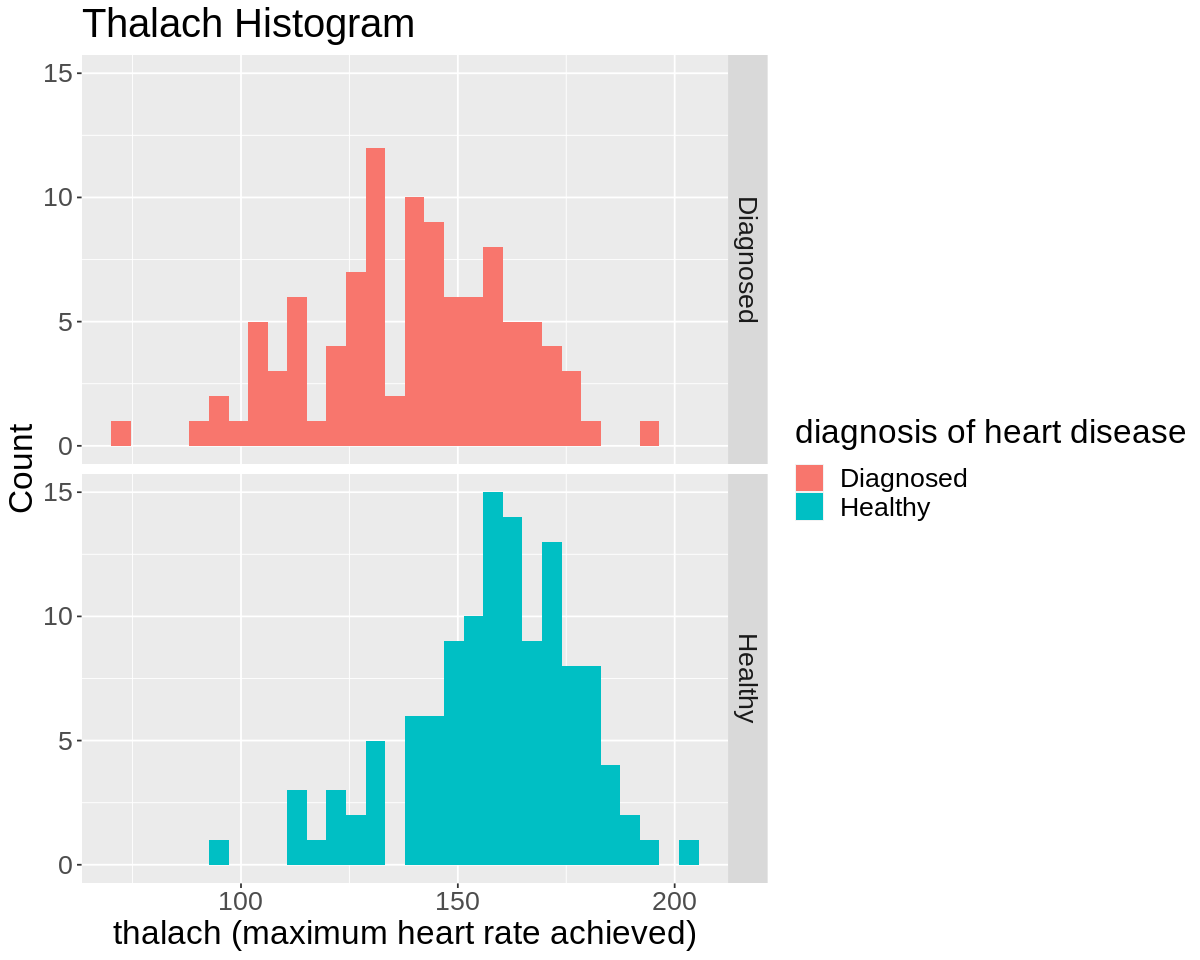

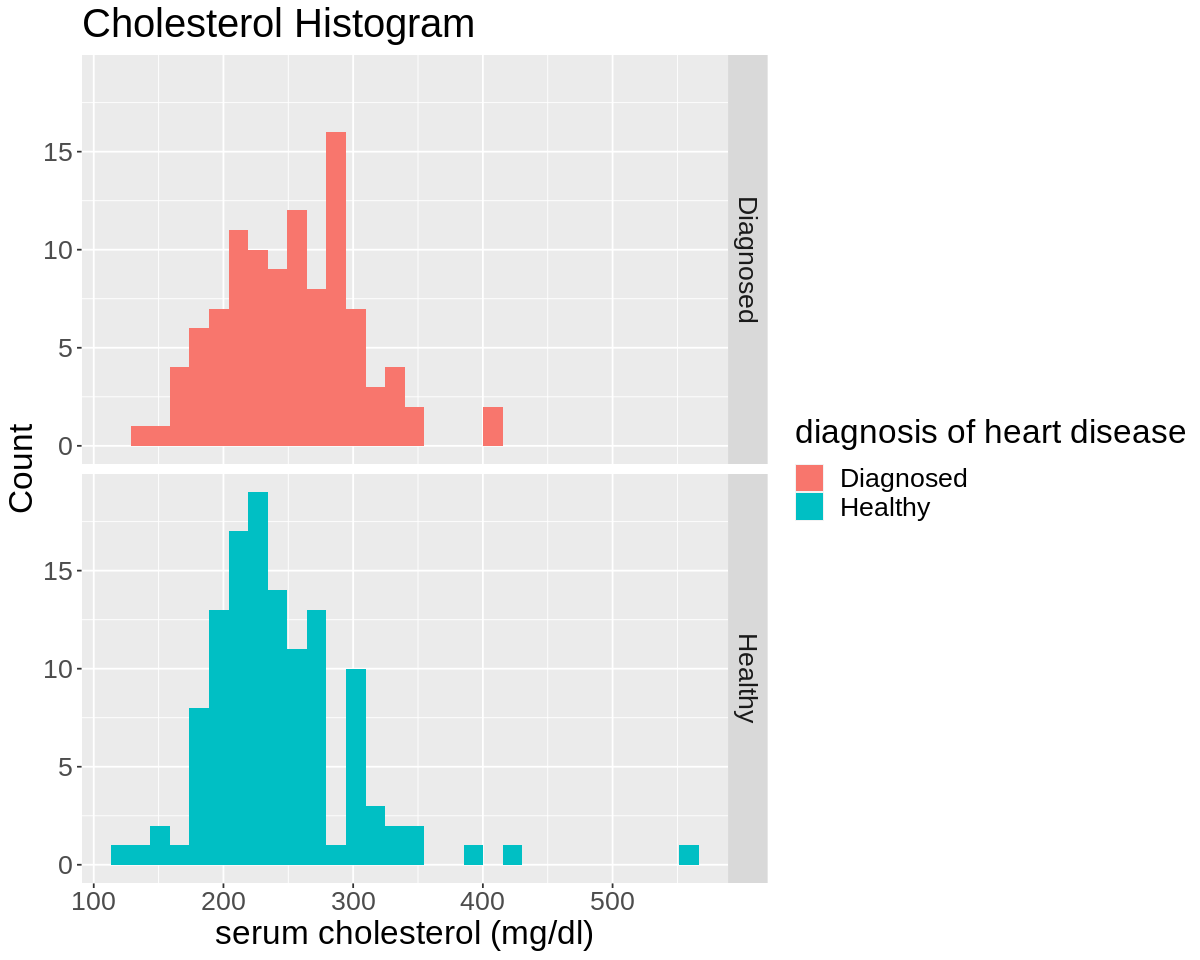

In [12]:
age_histogram = data_train %>%
        ggplot(aes(x = age, fill = target)) +
        geom_histogram() +
        labs(x = "age (years)", y = "Count", fill = "diagnosis of heart disease") + 
         ggtitle("Age Histogram") +
        theme(text = element_text(size = 20)) +
        facet_grid(rows = vars(target))
age_histogram


thalach_histogram = data_train %>%
        ggplot(aes(x = thalach, fill = target)) +
        geom_histogram() +
        labs(x = "thalach (maximum heart rate achieved)", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Thalach Histogram") +
        theme(text = element_text(size = 20)) + 
        facet_grid(rows = vars(target))
thalach_histogram

chol_histogram = data_train %>%
        ggplot(aes(x = chol, fill = target)) +
        geom_histogram() +
        labs(x = "serum cholesterol (mg/dl)", y = "Count", fill = "diagnosis of heart disease") + 
        ggtitle("Cholesterol Histogram") +
        theme(text = element_text(size = 20)) + 
        facet_grid(rows = vars(target))
chol_histogram

In [13]:
data_num <- data %>%
    select(age, trestbps, chol, thalach, oldpeak)

res <- cor(data_num)
round(res, 2)

,age,trestbps,chol,thalach,oldpeak
age,1.00,0.29,0.20,-0.39,0.20
trestbps,0.29,1.00,0.13,-0.05,0.19
chol,0.20,0.13,1.00,0.00,0.04
thalach,-0.39,-0.05,0.00,1.00,-0.35
oldpeak,0.20,0.19,0.04,-0.35,1.00


In [14]:
library(ggcorrplot)
options(repr.plot.width = 12, repr.plot.height = 12) #Remember to set your plot sizes to an appropiate size

model.matrix(~0+., data=data) %>% 
  cor(use="pairwise.complete.obs") %>% 
  ggcorrplot(show.diag = F, type="lower", lab=TRUE, lab_size=2)

ERROR: Error in library(ggcorrplot): there is no package called ‘ggcorrplot’


### Methods

Since we are working with quantitative data, we will use scatter plot to visualize data points and prediction between the variables we’ve chosen and the development of heart disease. From that graph, we can predict whether new data points would be diagnosed or not with heart disease. We would first create a KNN model for our data frame, then train the model and lastly make predictions. 

### Expected outcomes and significance

We expect a positive correlation with the age of the individual and their likelihood of having a heart disease, same for cholesterol. At the same time We also expect a reverse relationship with  maximum heart rate achieved (thalach) and their likelihood of having a heart disease. 


With these findings, We will have a greater understanding of what variables are correlated with heart disease. 


Conclusions gathered from this data analysis are correlational, and future studies can be done to determine if there are any causational links between the variables we studied and heart disease. There are also other variables we have not studied, and future analyses can be done on their potential correlation with heart disease. 
